In [3]:
import pandas as pd
# 두 단계 밖으로 나갔다가 data 폴더로 들어가는 경로
df = pd.read_csv('../../data/customer_hm.csv') 
df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,ACTIVE,NONE,49
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,ACTIVE,NONE,25
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,ACTIVE,NONE,24
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,ACTIVE,NONE,54
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,ACTIVE,Regularly,52


In [3]:
df.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    1
age                       0
dtype: int64

In [4]:
df["fashion_news_frequency"].value_counts()

fashion_news_frequency
NONE         674698
Regularly    373218
Monthly         658
Name: count, dtype: int64

In [44]:
# fashion_news_frequency가 결측치(NaN)인 데이터만 추출
missing_data = df[df['fashion_news_frequency'].isnull()]

missing_data

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age


FN(패션뉴스 구독여부)가 1(구독중)이므로 NONE이 아니라 1(구독중)의 최빈값 Regularly로 채우자

In [7]:
# 결측치 'Regularly'으로 채우기
df['fashion_news_frequency'] = df['fashion_news_frequency'].fillna('Regularly')

df.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64

In [4]:
#  원본 데이터 보존을 위한 카피본 생성
df2 = df.copy()

#  매핑 사전 정의
status_map = {'ACTIVE': 2, 'PRE-CREATE': 1, 'LEFT CLUB': 0}
frequency_map = {'Regularly': 2, 'Monthly': 1, 'NONE': 0}

#  매핑 적용
df2['club_member_status'] = df2['club_member_status'].map(status_map)
df2['fashion_news_frequency'] = df2['fashion_news_frequency'].map(frequency_map)

In [9]:
df2.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   customer_id             1048575 non-null  str  
 1   FN                      1048575 non-null  int64
 2   Active                  1048575 non-null  int64
 3   club_member_status      1048575 non-null  int64
 4   fashion_news_frequency  1048575 non-null  int64
 5   age                     1048575 non-null  int64
dtypes: int64(5), str(1)
memory usage: 48.0 MB


머신러닝을 안하고 시각화에는 문자형이 좋을 것 같아 원본 데이터 보존
df.copy()를 활용하여 원본 데이터(df)는 유지하고, 매핑 전용 데이터프레임(df2)을 생성

문자형 데이터 수치화 
club_member_status: ACTIVE(2), PRE-CREATE(1), LEFT CLUB(0) 
fashion_news_frequency: Regularly(2), Monthly(1), NONE(0)

고객 상태가 활성화에 가까울 수록 높은 숫자로 매핑, 패션 뉴스 구독 빈도도 자주 구독할수록 높은 숫자로 매핑
1이 신규이므로 활성화 상태로 봐야 함!

In [8]:
# 나이를 나이대별로 나눠 파생변수 생성
def cate_age(age):
    if age < 20: return '10대'
    elif age < 30: return '20대'
    elif age < 40: return '30대'
    elif age < 50: return '40대'
    elif age < 60: return'50대'
    elif age < 70: return'60대'
    elif age < 80: return'70대'
    elif age < 90: return'80대'
    else: return '90대'

df2['age_segment'] = df2['age'].apply(cate_age)

df2.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,age_segment
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,2,0.0,49,40대
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,2,0.0,25,20대
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,2,0.0,24,20대
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,2,0.0,54,50대
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,2,2.0,52,50대


In [9]:
df2["age_segment"].value_counts()

age_segment
20대    409196
30대    181112
50대    174715
40대    157445
60대     56124
10대     55256
70대     13580
80대      1075
90대        72
Name: count, dtype: int64

In [18]:
# 전체에서 차지하는 비율 확인
df2["age_segment"].value_counts(normalize= True)*100

age_segment
20s     39.024009
30s     17.272203
50s     16.662137
40s     15.015140
60s      5.352407
10s      5.269628
70s+     1.404478
Name: proportion, dtype: float64

나이대별 파생변수 생성
0~19세: 10s
20~29 : 20s
30~39 : 30s
40~49 : 40s
50~59 : 50s
60~69 : 60s
70~99 : 70S+

20대(39%)으로 제일 높고, 30대(17.3%), 50대(16.7%)순이다.

In [31]:
# 세대별 평균 구독 빈도 확인
df2.groupby('age_segment')[['fashion_news_frequency']].mean()

,fashion_news_frequency
age_segment,
10s,0.743937
20s,0.690740
30s,0.646269
40s,0.725358
50s,0.754354
60s,0.843561
70s+,0.879269


fashion_news_frequency는 2가까울 수록 정기적으로 구독되어 있다.

패션 뉴스 알람 주기는 70대 이상이 가장 높고, 30대,20대가 가장 낮다.(20대,30대가 마케팅 동의를 가장 적게 하는 걸까?)

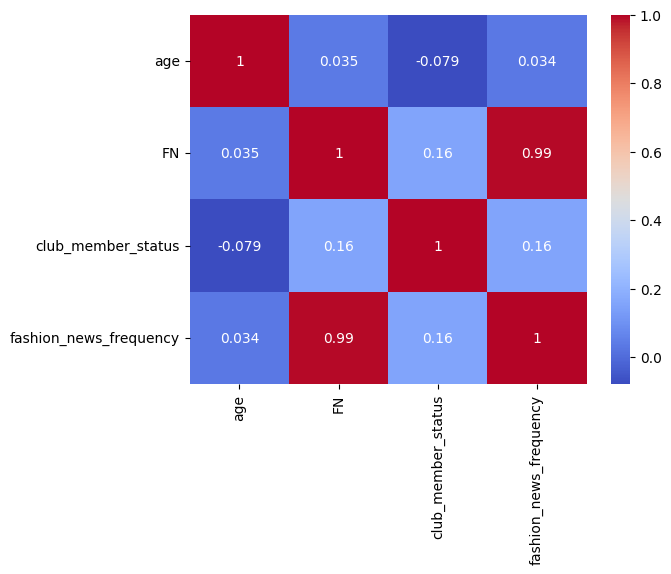

In [22]:
# 변수 간 상관관계 분석
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산 (숫자형 컬럼만)
corr = df2[['age', 'FN', 'club_member_status', 'fashion_news_frequency']].corr()

# 히트맵 시각화
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

lub_member_status와 fashion_news_frequency 간의 양의 상관관게가 있다.
회원상태가 활성인 고객일수록 패션 뉴스 구독 빈도가 높다?

In [27]:
# 전체 행의 개수
len(df2)

1048575

In [30]:
# 고유한 고객 아이디 개수
df2['customer_id'].nunique()

1048575

중복된 고객 아이디는 없음

In [47]:

# 탈퇴 고객(0) 데이터 제거
df2 = df2[df2['club_member_status'] != 0].copy()

len(df2)


1048216

In [6]:
df2['age'].max()

np.int64(99)

In [7]:
df['age'].min()

np.int64(16)